In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

In [2]:
from wordcloud import WordCloud

In [9]:
import seaborn as sns

In [3]:
df = pd.read_csv('../data/cleaned_insta.csv')

In [4]:
#reminder of column names 
df.columns

Index(['Username', 'Follower count:', 'Post ID', 'Media Type:', 'Caption',
       'Likes', 'Comments', 'Timestamp', 'Tags', 'clean_captions',
       'collocated_captions', 'final_cleaned', 'hour', 'dayofweek', 'month'],
      dtype='object')

In [21]:
#create a second df without outliers for visualiztion called dfzoom

# Calculate the Z-scores for the 'Likes' column
z_scores = np.abs((df['Likes'] - df['Likes'].mean()) / df['Likes'].std())

# Define a threshold (e.g., 3 standard deviations from the mean)
threshold = 3

# Filter out rows with Z-scores beyond the threshold
dfzoom = df[z_scores < threshold]

Text analysis

In [5]:
# word cloud 
all_text = ' '.join(df['final_cleaned'])

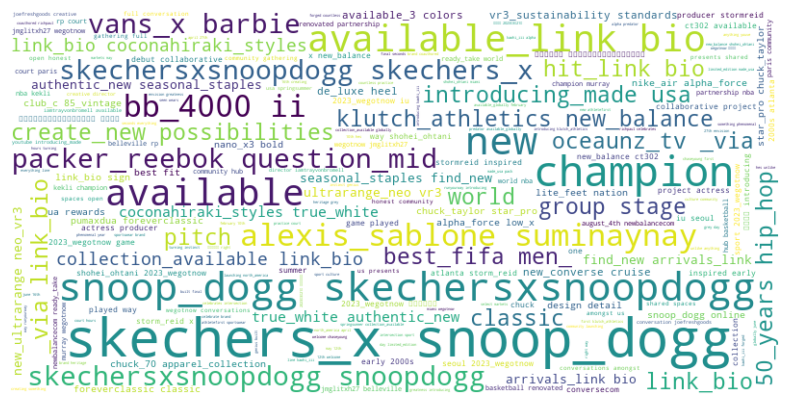

In [6]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
# word cloud 
all_text = ' '.join(df['clean_captions'])

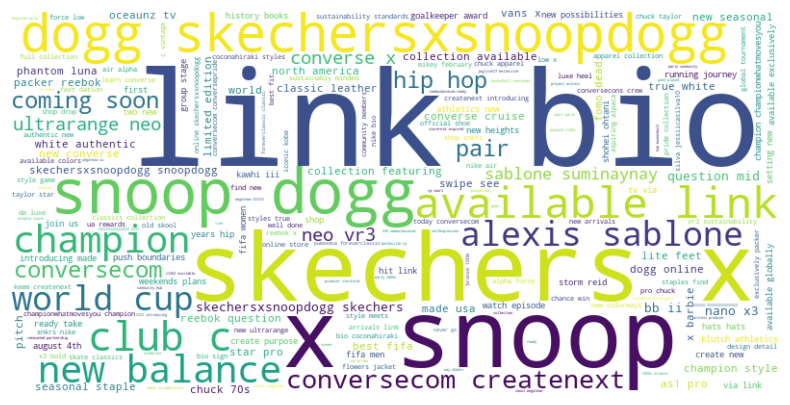

In [8]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Time analysis

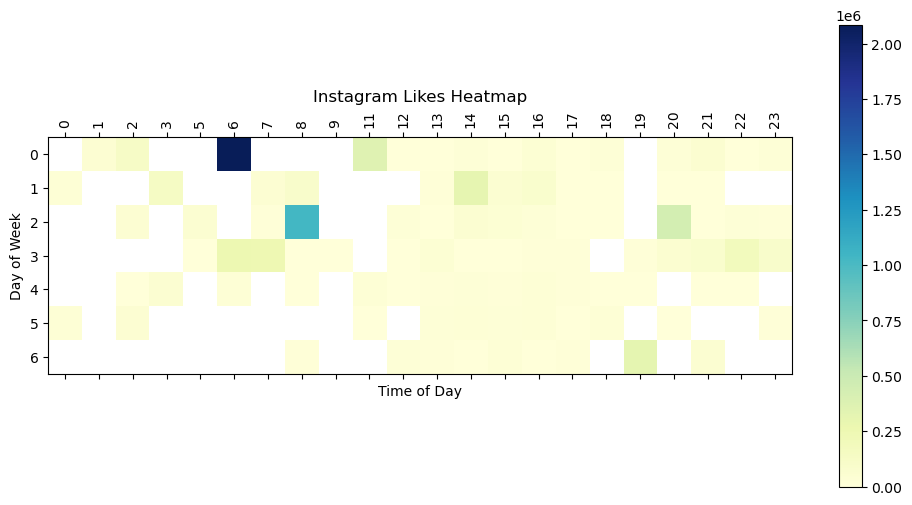

In [15]:
#Create a heatmap to understand the correlation of likes between Day Of Week, hour and Likes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Pivot the data to create a matrix for the heatmap
heatmap_data = df.pivot_table(index='dayofweek', columns='hour', values='Likes', aggfunc='mean')

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.matshow(heatmap_data, cmap='YlGnBu')  # You can choose a colormap that suits your preference

# Add labels and a colorbar
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=90)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.colorbar(cax)

# Add a title
plt.title('Instagram Likes Heatmap')

# Show the plot
plt.show()


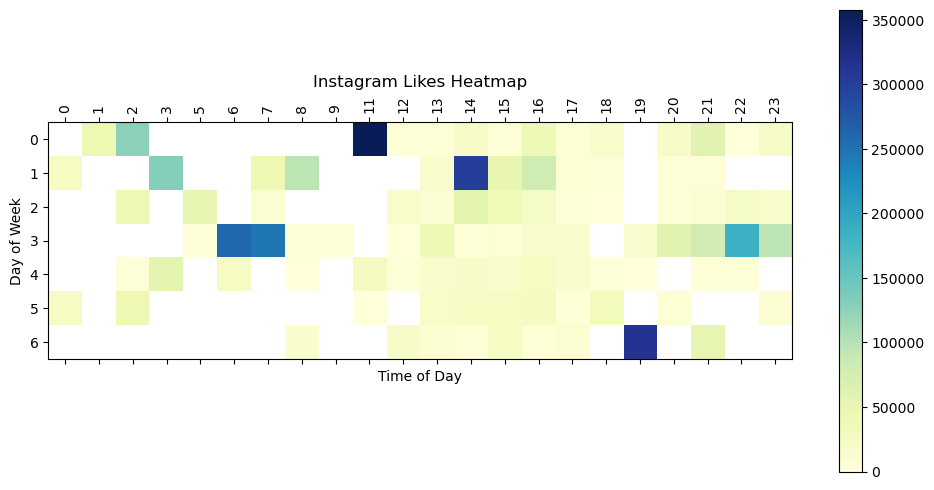

In [24]:
# heatmap removes outliers 

# Pivot the data to create a matrix for the heatmap
heatmap_data = dfzoom.pivot_table(index='dayofweek', columns='hour', values='Likes', aggfunc='mean')

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.matshow(heatmap_data, cmap='YlGnBu')  # You can choose a colormap that suits your preference

# Add labels and a colorbar
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=90)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.colorbar(cax)

# Add a title
plt.title('Instagram Likes Heatmap')

# Show the plot
plt.show()

In [14]:
df.corr()

/var/folders/9z/l0mdtnzj2x9436mcqq197dtm0000gn/T/ipykernel_89023/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Follower count:,Post ID,Media Type:,Likes,Comments,Tags,hour,dayofweek,month
Follower count:,1.000000,0.143277,-0.124728,0.070388,0.122347,0.208558,-0.088411,0.082871,0.078258
Post ID,0.143277,1.000000,0.100223,-0.133947,-0.349511,0.035756,0.000207,0.032008,0.464222
Media Type:,-0.124728,0.100223,1.000000,0.059373,-0.116348,0.024692,-0.017479,-0.137812,0.097035
Likes,0.070388,-0.133947,0.059373,1.000000,0.500697,-0.020115,-0.134589,-0.119531,-0.132050
Comments,0.122347,-0.349511,-0.116348,0.500697,1.000000,0.025660,0.050183,-0.016572,-0.388772
Tags,0.208558,0.035756,0.024692,-0.020115,0.025660,1.000000,-0.180756,0.050479,0.052500
hour,-0.088411,0.000207,-0.017479,-0.134589,0.050183,-0.180756,1.000000,-0.030085,0.076166
dayofweek,0.082871,0.032008,-0.137812,-0.119531,-0.016572,0.050479,-0.030085,1.000000,0.075872
month,0.078258,0.464222,0.097035,-0.132050,-0.388772,0.052500,0.076166,0.075872,1.000000


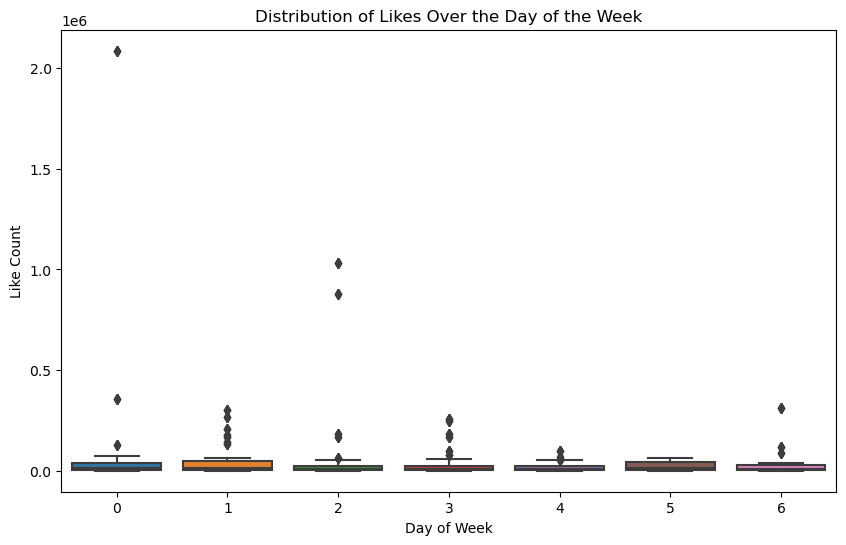

In [17]:
#boxplots

plt.figure(figsize=(10, 6))
sns.boxplot(x='dayofweek', y='Likes', data=df)
plt.xlabel('Day of Week')
plt.ylabel('Like Count')
plt.title('Distribution of Likes Over the Day of the Week')
plt.show()

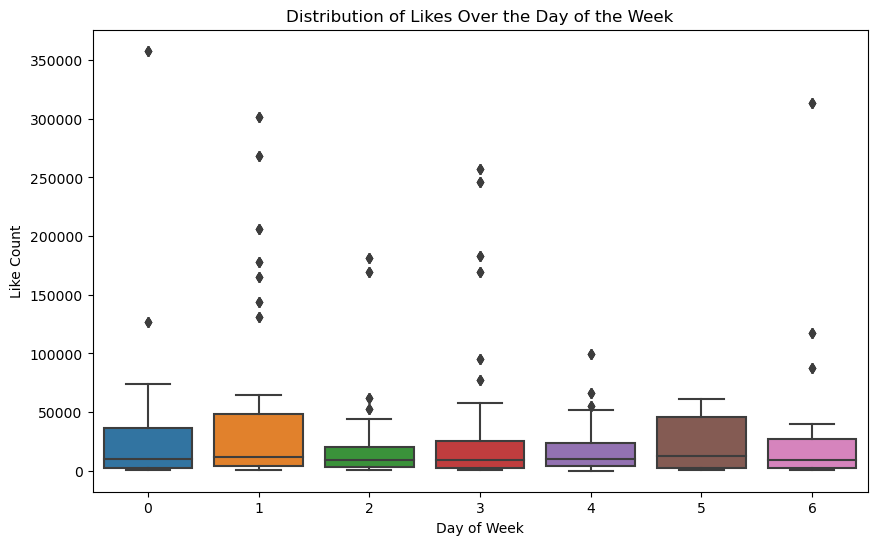

In [22]:
#boxplot no outliers 

plt.figure(figsize=(10, 6))
sns.boxplot(x='dayofweek', y='Likes', data=dfzoom)
plt.xlabel('Day of Week')
plt.ylabel('Like Count')
plt.title('Distribution of Likes Over the Day of the Week')
plt.show()

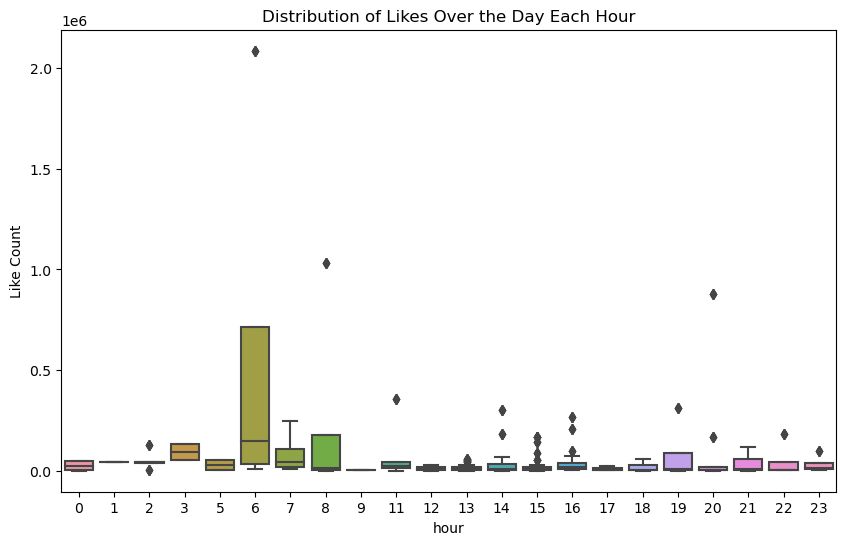

In [20]:
#boxplots

plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='Likes', data=df)
plt.xlabel('hour')
plt.ylabel('Like Count')
plt.title('Distribution of Likes Over the Day Each Hour')
plt.show()

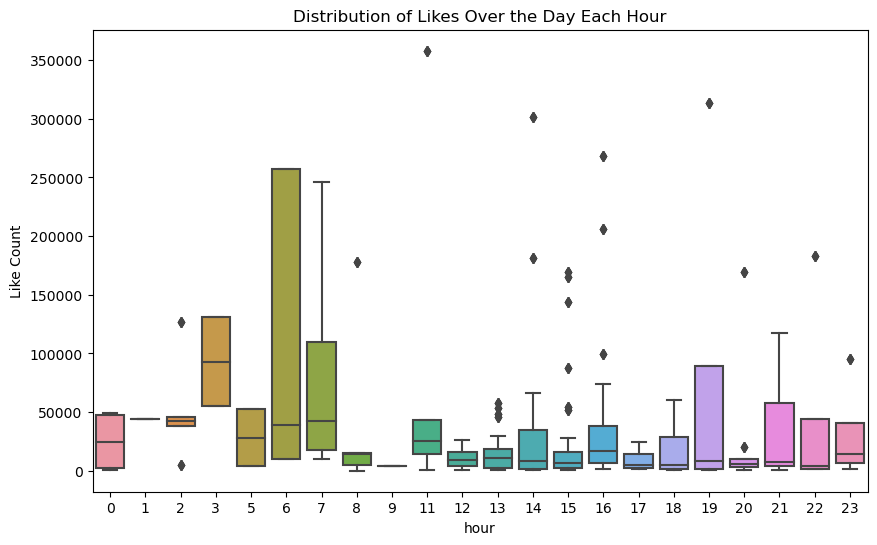

In [23]:
#boxplot no outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='Likes', data=dfzoom)
plt.xlabel('hour')
plt.ylabel('Like Count')
plt.title('Distribution of Likes Over the Day Each Hour')
plt.show()

Media Type Analysis

<Axes: xlabel='Media Type:', ylabel='count'>

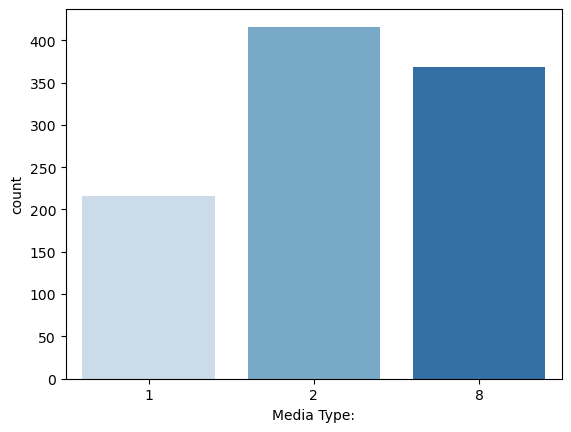

In [38]:
sns.countplot(data=df, x='Media Type:', palette="Blues")

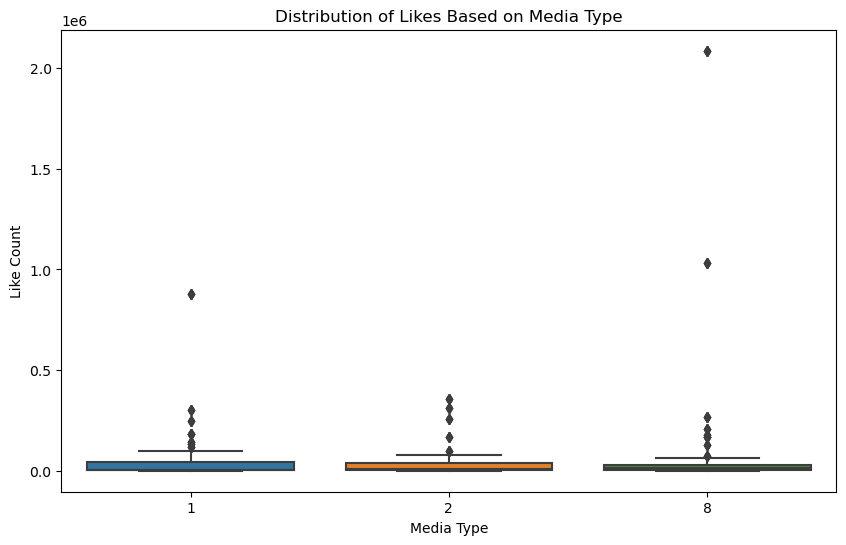

In [26]:
#boxplots

plt.figure(figsize=(10, 6))
sns.boxplot(x='Media Type:', y='Likes', data=df)
plt.xlabel('Media Type')
plt.ylabel('Like Count')
plt.title('Distribution of Likes Based on Media Type')
plt.show()

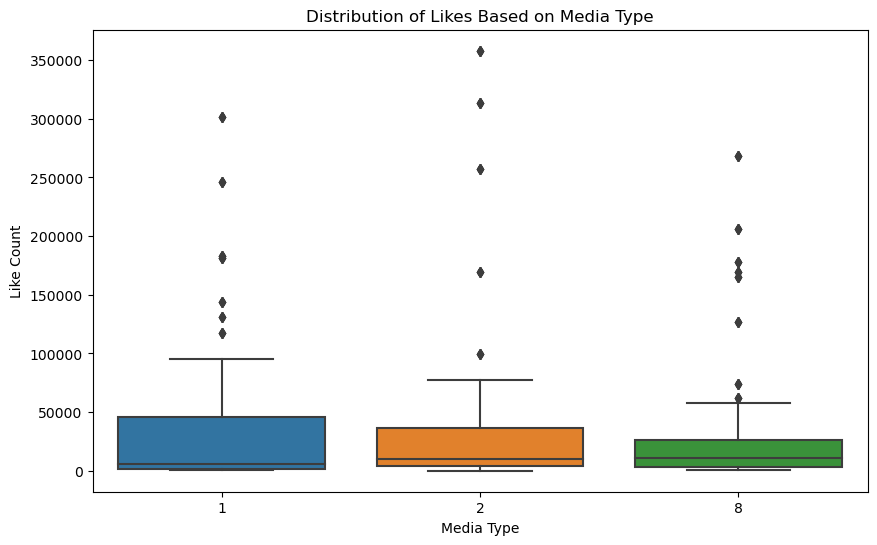

In [28]:
#boxplot without outlier

plt.figure(figsize=(10, 6))
sns.boxplot(x='Media Type:', y='Likes', data=dfzoom)
plt.xlabel('Media Type')
plt.ylabel('Like Count')
plt.title('Distribution of Likes Based on Media Type')
plt.show()

<Axes: xlabel='Likes', ylabel='Density'>

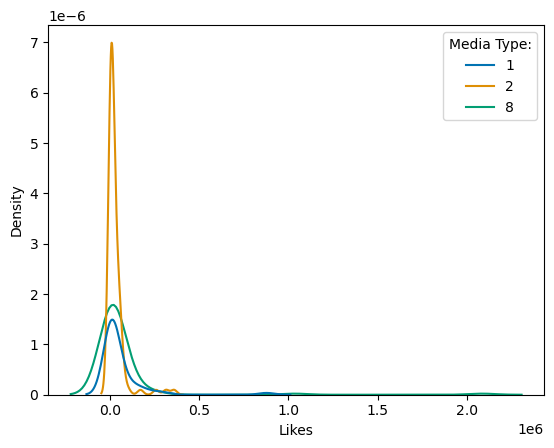

In [39]:
#create kdeplot for tags
sns.kdeplot(data=df, x = 'Likes', hue='Media Type:', palette="colorblind")

<Axes: xlabel='Likes', ylabel='Density'>

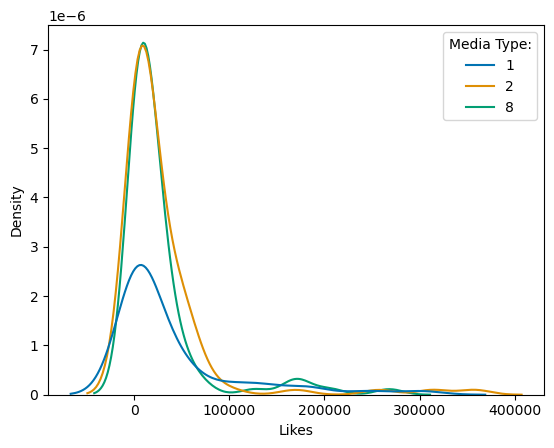

In [40]:
#create kdeplot for tags
sns.kdeplot(data=dfzoom, x = 'Likes', hue='Media Type:', palette="colorblind")

Tag Count Analysis

<Axes: xlabel='Tags', ylabel='count'>

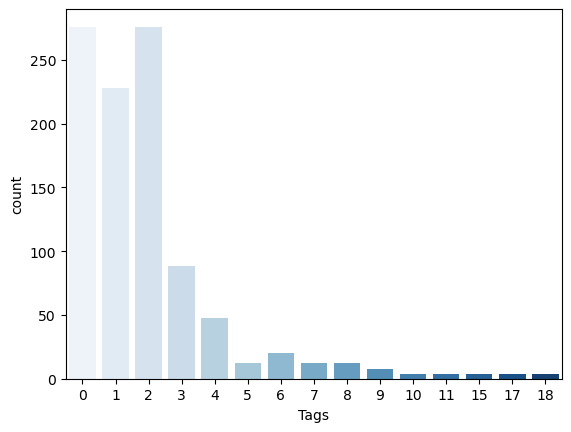

In [36]:
sns.countplot(data=df, x='Tags', palette="Blues")

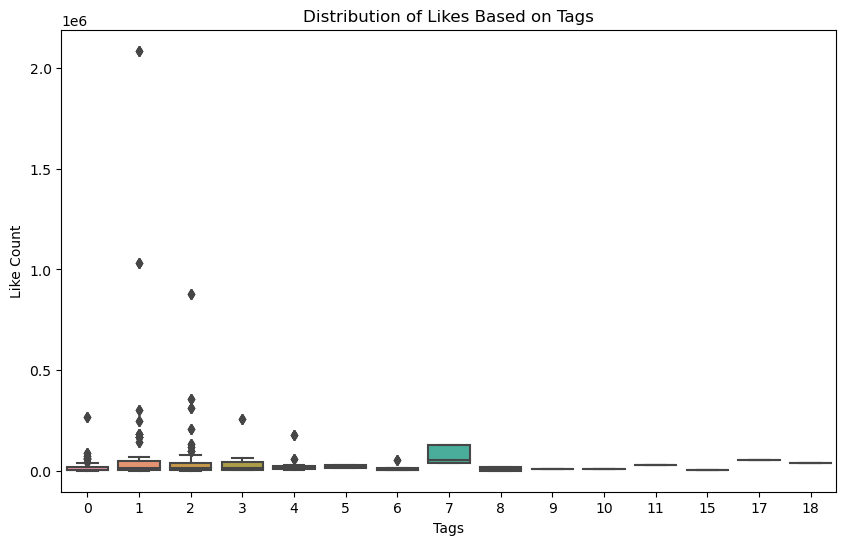

In [29]:
#boxplots

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tags', y='Likes', data=df)
plt.xlabel('Tags')
plt.ylabel('Like Count')
plt.title('Distribution of Likes Based on Tags')
plt.show()

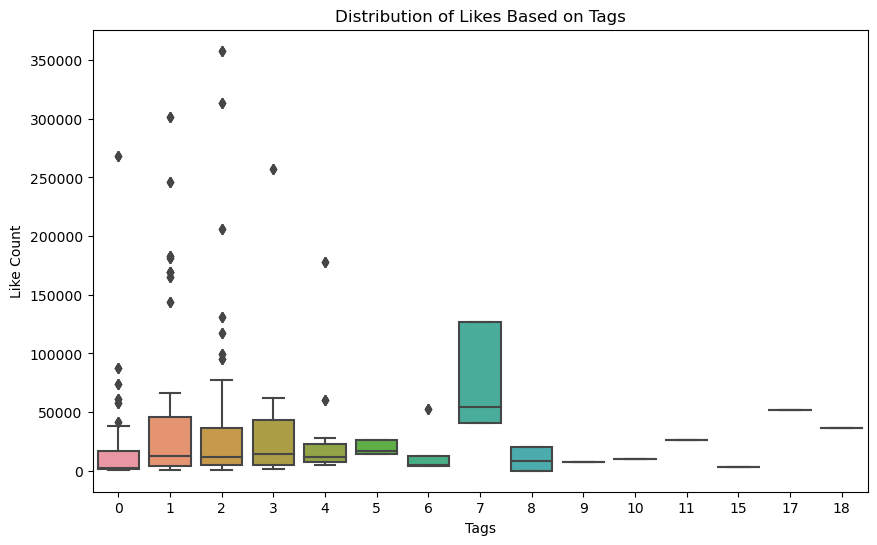

In [30]:
#boxplot zoomed

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tags', y='Likes', data=dfzoom)
plt.xlabel('Tags')
plt.ylabel('Like Count')
plt.title('Distribution of Likes Based on Tags')
plt.show()

/var/folders/9z/l0mdtnzj2x9436mcqq197dtm0000gn/T/ipykernel_89023/300325376.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x = 'Likes', hue='Tags', palette="colorblind")


<Axes: xlabel='Likes', ylabel='Density'>

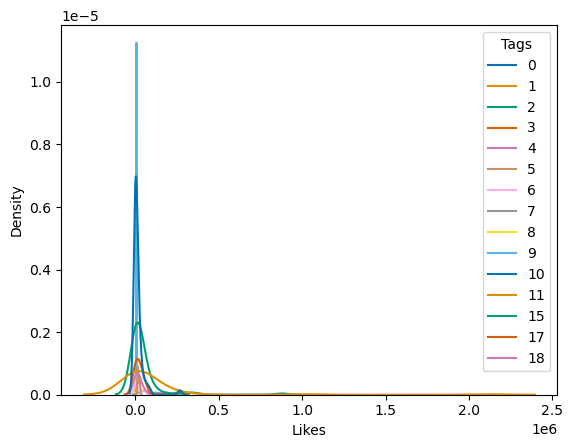

In [34]:
#create kdeplot for tags
sns.kdeplot(data=df, x = 'Likes', hue='Tags', palette="colorblind")

/var/folders/9z/l0mdtnzj2x9436mcqq197dtm0000gn/T/ipykernel_89023/332087687.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dfzoom, x = 'Likes', hue='Tags', palette="colorblind")


<Axes: xlabel='Likes', ylabel='Density'>

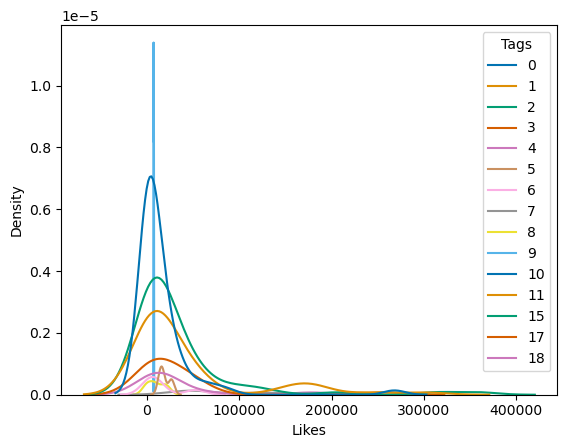

In [33]:
#create kdeplot for tags
sns.kdeplot(data=dfzoom, x = 'Likes', hue='Tags', palette="colorblind")

In [41]:
# save the data to a new csv file

from library.sb_utils import save_file

datapath = '../data'
save_file(dfzoom, 'zoom_insta.csv', datapath)

Writing file.  "../data/zoom_insta.csv"
